In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, CheckButtons
import seaborn as sns
import numpy as np
import os
import sys
import ipywidgets as widgets
from ipywidgets import interact

Problem Statement

The World's energy needs are increasing and the availability of fossil fuels is decreasing, meaning that we need to find a solution before it's too late. We are going to specifically take a look at the US and its demands and projections. Although this is a global problem, I presume that a lot of value can be extracted from analyzing the US and could be used beneficially in other countries as well. The fundamental question is what are the projected energy needs for the US in the next 10 years and how much more energy will we need to produce to meet these needs? To be more specific, would this be possible with the use of Solar Energy, at what rate would we need to install solar panels and batteries, what zones have higher energy demands and how does sunshine play a role in all of this? How much surface area would need to be used for all of these solar panels and what would the cost for such a project be as well as the potential return on investment. Solving a problem like this would help significantly with pollution, climate change and many other environmental benefits. It would also allow us to not worry about exhausting finite energy sources such as fossil fuels and set up humanity for a better future. 

Context

This project specifically focuses on the US so there may be insights that are relevant for other parts of the world and others that are not very useful. Sunshine in the US is likely greater than in a country like Canada, so this could potentially be a large factor when making predictions for other countries. Countries also have diverse climates, terrains, and surface areas and many other diverse features which could also have impacts on the relevancy of the derived insights.  The main focus is to use data on sunlight as well as required land and to project possible price and return on investment. This project also does not consider the feasibility of manufacturing the sufficient amount of solar panels, batteries, maintenance of equipment or account for installation. The primary focus is to crunch the numbers to see if such a project would be theoretically possible. 

Criteria for Success

Success would be showing that the return on investment within a 10-30 year period would be positive and that the power produced by the solar panels would be enough to supply 90% of our current and projected energy demands in the US within 10 years and also be able to keep up with the increasing energy needs. The required land should also be 10% or lower of the total area of land in the US.

Scope of Solution Space

The solution space is more about showing the theoretical ability to execute a project such as this. It does not take into account how this project will be funded or how the resources will be collected etc.  It will however consider if the amount of money required is feasible and if this investment will pay off within the set time frame of 10-30 years. We are trying to prove essentially that 1) there is enough land area, 2) the amount of power generated by the panels plus the battery storage will be enough to power 90% of the USs energy demands and keep up with projected demands, 3) The investment will be recovered in a 10-30 year span. 

Constraints

One constraint of the project is calculating the required labor. It may be shown that it's feasible to finance a project, that there is enough land area, and that the investment would pay off but perhaps the amount of labor that is required is beyond what we have access to. Another constraint is calculating if there are enough physical materials and resources to build a sufficient amount of solar panels which will not be considered in this particular project. We are also assuming that all of the energy produced by the solar panels will be stored in batteries while in reality, there may be a lack of sufficient battery storage. We are assuming that with the improving technology of battery storage, this problem will eventually be resolved. It's also worth noting that this project is being done using data from the United States and that insights may not apply as much to other countries due to factors such as sunlight, technology, landscape, finances etc. 

Stakeholders

The primary stakeholders may be governmental agencies, environmental companies, private investors, local communities and many more. It is hard to predict and name all of the investors in such a large scale project and would require collaboration and input from various groups. 


In [48]:
energy_use = pd.read_csv('organised_Gen.csv')
us_population = pd.read_csv('population_usa.csv')
sunshine_hours = pd.read_csv('sunshine hours by city.csv')
us_land_area = pd.read_csv('us-state-land-area.csv')


# ENERGY USE

In [3]:
energy_use.head()


,Unnamed: 0,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,4,2001,1,AK,Total Electric Power Industry,Wind,87.0


In [4]:
energy_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496774 entries, 0 to 496773
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  496774 non-null  int64  
 1   YEAR                        496774 non-null  int64  
 2   MONTH                       496774 non-null  int64  
 3   STATE                       496774 non-null  object 
 4   TYPE OF PRODUCER            496774 non-null  object 
 5   ENERGY SOURCE               496774 non-null  object 
 6   GENERATION (Megawatthours)  496774 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 26.5+ MB


In [5]:
#drop unamed column and rename index
energy_use.drop('Unnamed: 0', axis=1, inplace = True)
energy_use.index.name = 'Index'

In [6]:
energy_use['ENERGY SOURCE'].unique()

array(['Coal', 'Petroleum', 'Natural Gas', 'Hydroelectric Conventional',
       'Wind', 'Total', 'Other Gases', 'Nuclear',
       'Wood and Wood Derived Fuels', 'Other Biomass', 'Other',
       'Solar Thermal and Photovoltaic', 'Pumped Storage', 'Geothermal'],
      dtype=object)

In [7]:
energy_use = energy_use[energy_use['YEAR'] != 2022]

In [8]:
energy_use.head()

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
Index,,,,,,
0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,2001,1,AK,Total Electric Power Industry,Wind,87.0


In [9]:
energy_use = energy_use[energy_use['ENERGY SOURCE'].isin(['Solar Thermal and Photovoltaic','Total'])]

In [10]:
energy_use.head()

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
Index,,,,,,
5,2001,1,AK,Total Electric Power Industry,Total,590145.0
11,2001,1,AK,"Electric Generators, Electric Utilities",Total,493206.0
14,2001,1,AK,"Combined Heat and Power, Electric Power",Total,19955.0
17,2001,1,AK,"Combined Heat and Power, Commercial Power",Total,9824.0
20,2001,1,AK,"Combined Heat and Power, Industrial Power",Total,67160.0


In [11]:
energy_use.drop('TYPE OF PRODUCER', axis=1, inplace=True)

In [12]:
energy_use.rename(columns={'GENERATION (Megawatthours)': 'MEGAWATT HOURS'},inplace=True)

In [13]:
energy_use['ENERGY SOURCE'].replace('Solar Thermal and Photovoltaic', 'Solar', inplace=True)

In [14]:
total_gen = energy_use[energy_use['ENERGY SOURCE'] == 'Total']
solar_gen = energy_use[energy_use['ENERGY SOURCE'] == 'Solar']

In [15]:
total_gen.head()

,YEAR,MONTH,STATE,ENERGY SOURCE,MEGAWATT HOURS
Index,,,,,
5,2001,1,AK,Total,590145.0
11,2001,1,AK,Total,493206.0
14,2001,1,AK,Total,19955.0
17,2001,1,AK,Total,9824.0
20,2001,1,AK,Total,67160.0


In [16]:
solar_gen.head()

,YEAR,MONTH,STATE,ENERGY SOURCE,MEGAWATT HOURS
Index,,,,,
84,2001,1,AZ,Solar,0.0
93,2001,1,AZ,Solar,0.0
114,2001,1,CA,Solar,6500.0
126,2001,1,CA,Solar,29.0
136,2001,1,CA,Solar,6471.0


In [17]:
total_gen = total_gen.pivot_table(index='YEAR', columns='STATE',values='MEGAWATT HOURS',aggfunc='sum')

In [18]:
solar_gen = solar_gen.pivot_table(index='YEAR', columns='STATE',values='MEGAWATT HOURS',aggfunc='sum')

In [19]:
total_gen.head()

STATE,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,US-TOTAL,UT,VA,VT,WA,WI,WV,WY
YEAR,,,,,,,,,,,,,,,,,,,,,
2001,13487532.0,250690226.0,94384072.0,179822544.0,397192144.0,93752006.0,60981290.0,246478.0,13615370.0,381890686.0,...,192443952.0,745160010.0,7.473287e+09,71707500.0,148209496.0,10961228.0,166097340.0,117526868.0,163673450.0,89553876.0
2002,13534644.0,265841349.0,95223282.0,188263324.0,368420066.0,91200779.0,62622430.0,523960.0,12004981.0,406705553.0,...,192228530.0,771257079.0,7.716905e+09,73216011.0,150011312.0,10912380.0,205530098.0,116862873.0,189523505.0,87567678.0
2003,12677462.0,274974440.0,100802200.0,188792436.0,385577087.0,93233575.0,59090097.0,148288.0,14784572.0,425220024.0,...,184443582.0,758399368.0,7.766370e+09,76047335.0,150618842.0,12055924.0,200189380.0,120244851.0,189423106.0,87253204.0
2004,13053431.0,274709541.0,103855268.0,209128283.0,389560710.0,95738983.0,65266815.0,72974.0,15711105.0,436235853.0,...,195189090.0,780598265.0,7.941111e+09,76423959.0,157800077.0,10940760.0,204330101.0,120889869.0,179499126.0,89615211.0
2005,13153317.0,275897159.0,95589018.0,202957315.0,400585637.0,99233390.0,67099496.0,452084.0,16273136.0,440512824.0,...,194234337.0,793337444.0,8.110846e+09,76330262.0,157886089.0,11433509.0,203931697.0,123649326.0,187252572.0,91134619.0


In [20]:
solar_gen.fillna(0, inplace=True)

In [21]:
solar_gen['AK'] = total_gen['AK']
solar_gen['AK'] = 0

In [22]:
solar_gen.head()

STATE,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,TN,TX,US-TOTAL,UT,VA,VT,WA,WI,WY,AK
YEAR,,,,,,,,,,,,,,,,,,,,,
2001,0.0,0.0,978.0,1084542.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-10.0,1085510.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2002,0.0,0.0,918.0,1108744.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1109662.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2003,0.0,0.0,790.0,1067212.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1068002.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2004,0.0,0.0,8534.0,1141780.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1150314.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2005,0.0,0.0,27160.0,1073426.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1100587.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [23]:
solar_gen.columns.unique()

Index(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR',
       'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'US-TOTAL', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WY', 'AK'],
      dtype='object', name='STATE')

In [24]:
states = total_gen.columns
x_ticks = [2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020,2022]

In [25]:
def state_power(state):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Solar Power Gen plot
    axes[0].set_title(f"{state} Solar Power Gen")
    sns.lineplot(y=state, x=solar_gen.index, data=solar_gen, ax=axes[0])
    axes[0].set_xticks(x_ticks)
    axes[0].set_xticklabels(x_ticks, rotation=90)
    axes[0].set_ylabel('Megawatt Hours')

    # Total Power Gen plot
    axes[1].set_title(f"{state} Total Power Gen")
    sns.lineplot(y=state, x=total_gen.index, data=total_gen, ax=axes[1])
    axes[1].set_xticks(x_ticks)
    axes[1].set_xticklabels(x_ticks, rotation=90)
    axes[1].set_ylabel('Megawatt Hours in Millions')

    plt.show()

states_list = solar_gen.columns
state_dropdown = widgets.Dropdown(options=states_list, description='State:')


widgets.interact(state_power, state=state_dropdown)    

interactive(children=(Dropdown(description='State:', options=('AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', …

<function __main__.state_power(state)>

In [26]:
common_states = set(total_gen) & set(solar_gen)
common_states = list(common_states)
differences = [max(total_gen[state]) - max(solar_gen[state]) for state in common_states]
print(differences)

[194517053.0, 35684422.0, 259938689.0, 75822976.0, 104605854.81, 471996.0, 44714609.0, 131934935.0, 215304501.0, 199382899.0, 35665154.0, 312637806.0, 125211015.0, 86211009.0, 70463655.0, 8127198209.0, 14188311.0, 13892838.25, 22287564.0, 365079051.0, 136561077.0, 119190525.0, 248654893.0, 197494033.0, 17339502.0, 404954183.95, 60417040.58, 280669674.0, 482752517.0, 113368354.0, 225546306.0, 93217673.0, 172276269.0, 203752073.0, 109964432.0, 135073597.0, 233568587.12, 242323385.0, 189619376.44, 291303203.0, 87667895.0, 131786917.0, 311687672.67, 938848922.0, 103997025.0, 48932112.0, 79654744.0, 17115310.0, 152182065.0, 483545813.0]


In [27]:
print(len(differences))
print(len(common_states))

50
50


In [28]:
max_differences = pd.DataFrame(columns=common_states)

In [29]:
max_differences.columns

Index(['TN', 'ID', 'IN', 'NM', 'WY', 'DC', 'ME', 'WI', 'LA', 'VA', 'SD', 'OH',
       'OR', 'UT', 'NV', 'US-TOTAL', 'VT', 'AK', 'HI', 'CA', 'MS', 'MN', 'NC',
       'KY', 'DE', 'IL', 'MT', 'GA', 'PA', 'KS', 'AZ', 'MA', 'OK', 'SC', 'CO',
       'AR', 'WA', 'MI', 'MO', 'NY', 'CT', 'IA', 'AL', 'TX', 'MD', 'NH', 'NE',
       'RI', 'NJ', 'FL'],
      dtype='object')

In [30]:
max_differences['KS']

Series([], Name: KS, dtype: object)

In [31]:
it = 0
for col in max_differences.columns:
    max_differences.loc[0, col] = differences[it]
    it += 1


    


In [32]:
max_differences = max_differences.T

In [33]:
max_differences.columns=['Difference']

In [34]:
max_differences.sort_values('Difference',ascending=False)

,Difference
US-TOTAL,8127198209.0
TX,938848922.0
FL,483545813.0
PA,482752517.0
IL,404954183.95
CA,365079051.0
OH,312637806.0
AL,311687672.67
NY,291303203.0
GA,280669674.0


In [35]:
max_differences['Max_Solar'] = [max(solar_gen[state]) for state in common_states]
max_differences['Max_Total'] = [max(total_gen[state]) for state in common_states]

In [36]:
max_differences.sort_values(by='Max_Total', ascending=False)

,Difference,Max_Solar,Max_Total
US-TOTAL,8127198209.0,229356482.0,8.356555e+09
TX,938848922.0,28274625.0,9.671235e+08
FL,483545813.0,18109785.0,5.016556e+08
PA,482752517.0,544204.0,4.832967e+08
CA,365079051.0,68518330.0,4.335974e+08
IL,404954183.95,1055655.0,4.060098e+08
OH,312637806.0,1314840.0,3.139526e+08
AL,311687672.67,990747.0,3.126784e+08
NY,291303203.0,2471636.0,2.937748e+08
GA,280669674.0,9640641.0,2.903103e+08


In [37]:
max_differences.reset_index()

,index,Difference,Max_Solar,Max_Total
0,TN,194517053.0,672037.0,1.951891e+08
1,ID,35684422.0,1131203.0,3.681562e+07
2,IN,259938689.0,1337309.0,2.612760e+08
3,NM,75822976.0,3525704.0,7.934868e+07
4,WY,104605854.81,360276.0,1.049661e+08
5,DC,471996.0,51964.0,5.239600e+05
6,ME,44714609.0,355464.0,4.507007e+07
7,WI,131934935.0,785432.0,1.327204e+08
8,LA,215304501.0,320204.0,2.156247e+08
9,VA,199382899.0,6729467.0,2.061124e+08


In [38]:
total_US_Max = max_differences.loc[max_differences.index == 'US-TOTAL']

In [39]:
max_differences = max_differences[max_differences.index != 'US-TOTAL']



In [40]:
max_differences.sort_values(by='Max_Total', ascending=False, inplace=True)

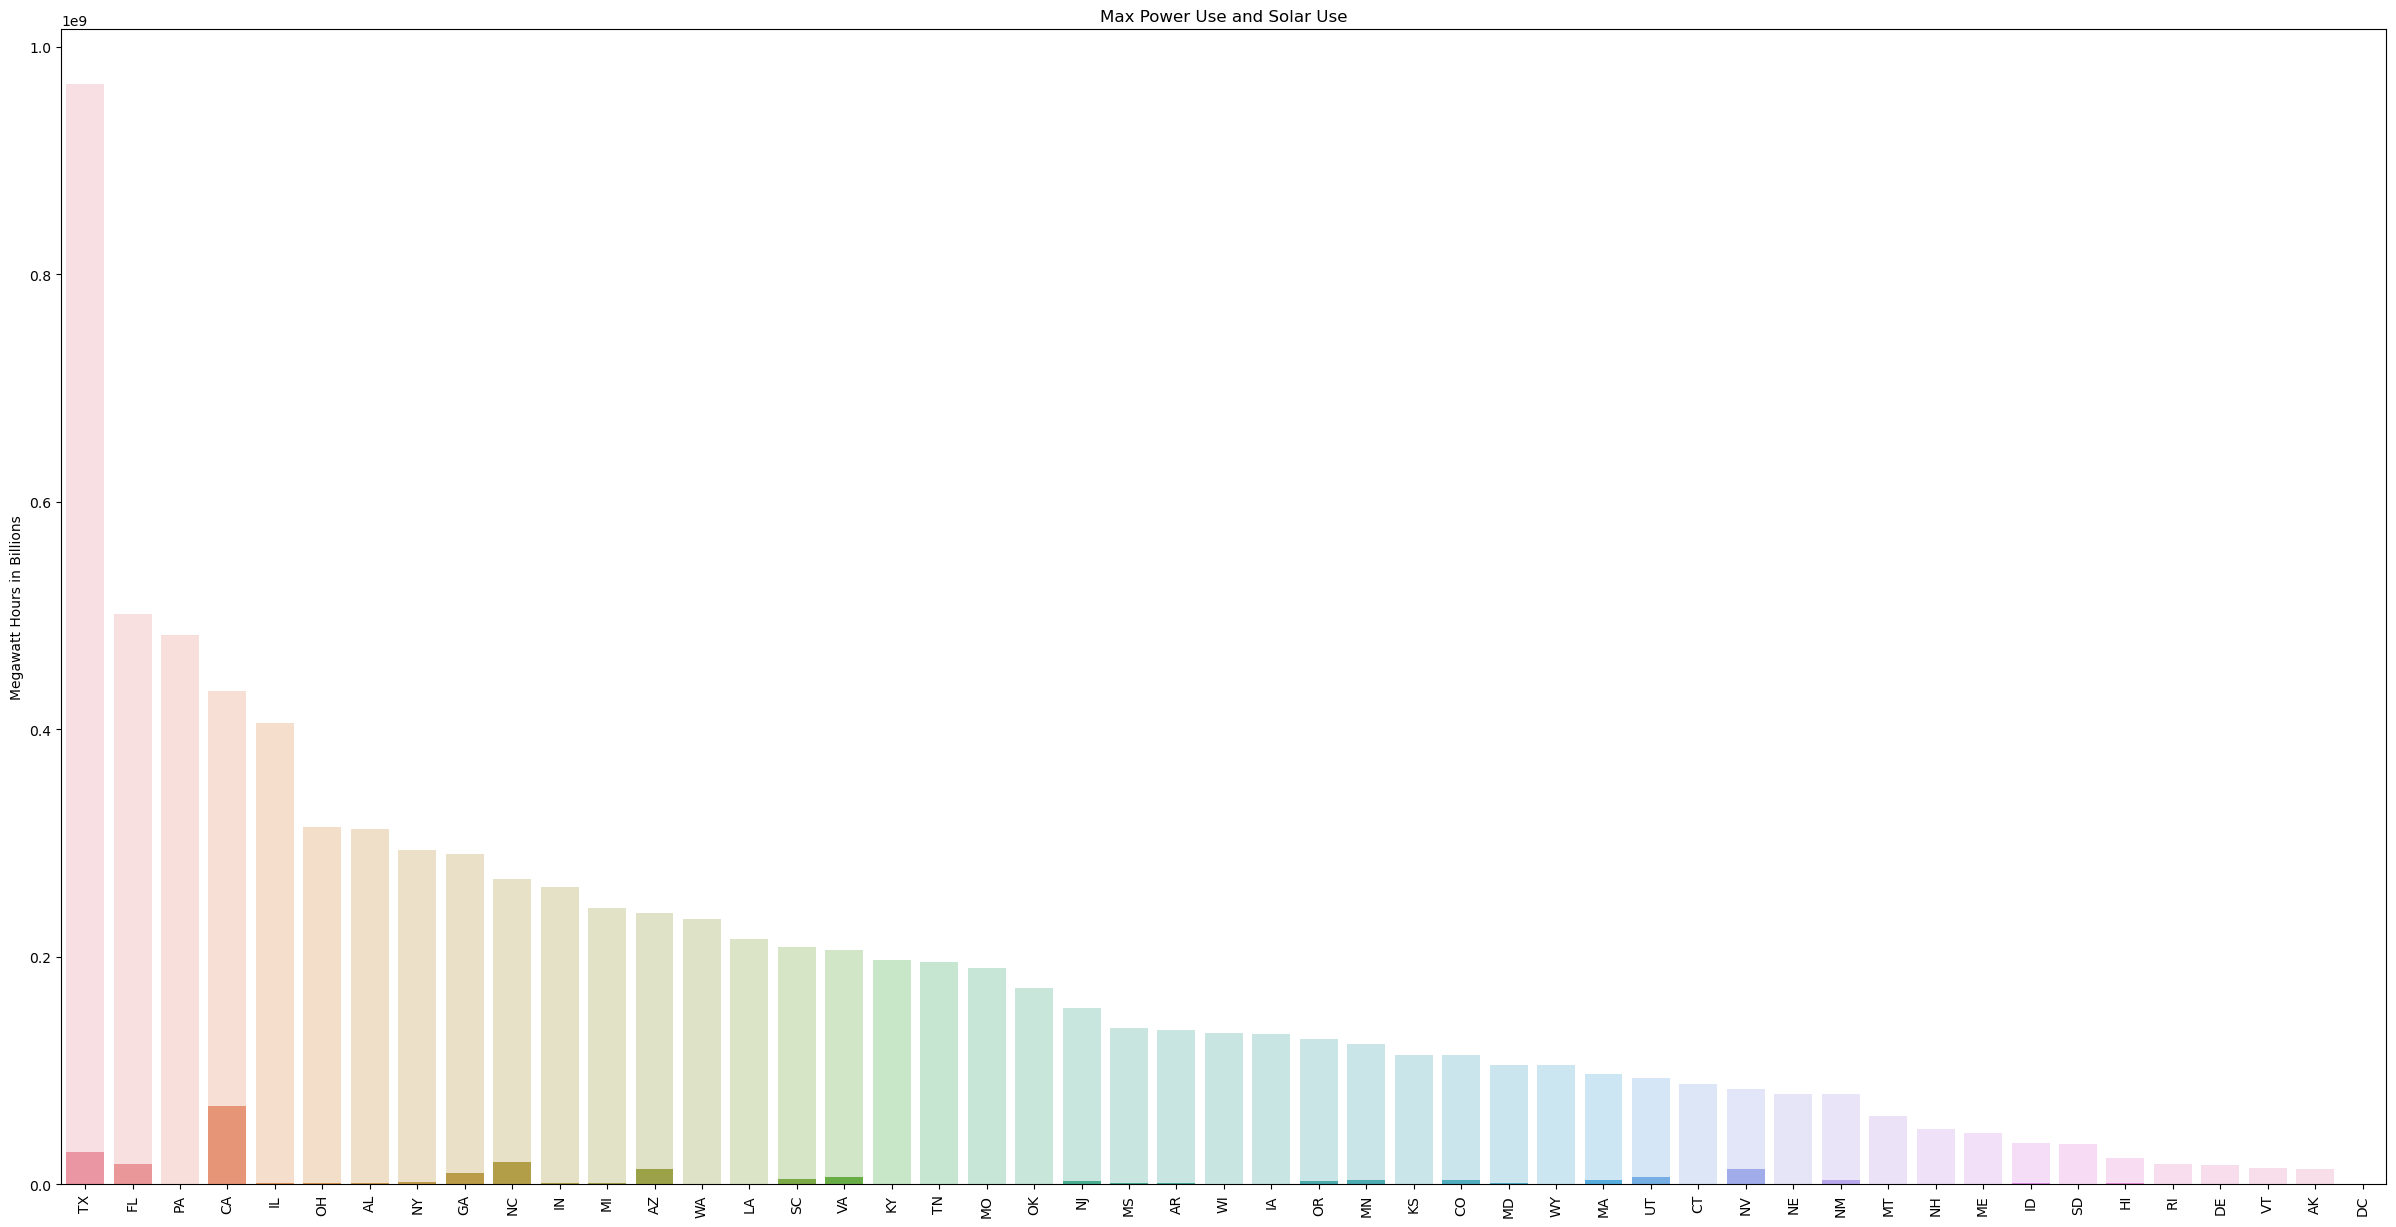

In [46]:
# Finds the difference of total power gen and how much of it was solar
plt.figure(figsize=(30,15))
sns.barplot(x=max_differences.index, y='Max_Total', data=max_differences, alpha = .3)
sns.barplot(x=max_differences.index, y='Max_Solar', data=max_differences)
plt.ylabel('Megawatt Hours in Billions')
plt.xticks(rotation=90)
plt.title('Max Power Use and Solar Use')


plt.show()

In [42]:
total_US_Max


,Difference,Max_Solar,Max_Total
US-TOTAL,8127198209.0,229356482.0,8.356555e+09


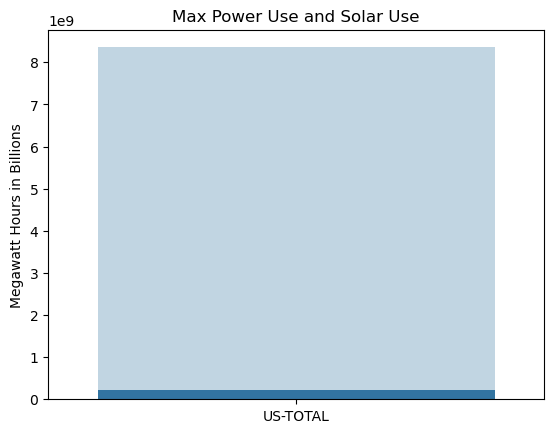

In [43]:

sns.barplot(x=total_US_Max.index, y='Max_Total', data=total_US_Max, alpha = .3)
sns.barplot(x=total_US_Max.index, y='Max_Solar', data=total_US_Max)
plt.ylabel('Megawatt Hours in Billions')

plt.title('Max Power Use and Solar Use')


plt.show()

# Sunshine Hours per City

In [49]:
sunshine_hours.head()

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Afghanistan,Kabul,177.2,178.6,204.5,232.5,310.3,353.4,356.8,339.7,303.9,282.6,253.2,182.4,3175.1
1,Albania,Tirana,124.0,125.0,165.0,191.0,263.0,298.0,354.0,327.0,264.0,218.0,127.0,88.0,2544.0
2,Algeria,Algiers,149.0,165.0,202.0,258.0,319.0,318.0,350.0,319.0,237.0,229.0,165.0,136.0,2847.0
3,Algeria,Tamanrasset,297.6,275.5,322.4,327.0,328.6,306.0,356.5,331.7,288.0,310.0,285.0,272.8,3686.0
4,Angola,Luanda,219.0,208.0,213.0,199.0,233.0,223.0,175.0,150.0,145.0,164.0,199.0,212.0,2341.0


In [50]:
sunshine_hours.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Congo', 'Croatia', 'Cyprus',
       'Czech Republic', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea',
       'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands',
       'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Ivory Coast', 'Japan', 'Kazakhstan', 'Kenya',
       'Latvia', 'Libya', 'Lithuania

In [51]:
sunshine_hours_us = sunshine_hours[sunshine_hours['Country'] == 'United States']

In [58]:
sunshine_hours_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 314 to 367
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  54 non-null     object 
 1   City     54 non-null     object 
 2   Jan      54 non-null     float64
 3   Feb      54 non-null     float64
 4   Mar      54 non-null     float64
 5   Apr      54 non-null     float64
 6   May      54 non-null     float64
 7   Jun      54 non-null     float64
 8   Jul      54 non-null     float64
 9   Aug      54 non-null     float64
 10  Sep      54 non-null     float64
 11  Oct      54 non-null     float64
 12  Nov      54 non-null     float64
 13  Dec      54 non-null     float64
 14  Year     54 non-null     float64
dtypes: float64(13), object(2)
memory usage: 6.8+ KB


In [56]:
sunshine_hours_us.City.nunique()

54

In [57]:
sunshine_hours_us.City.unique()

array(['Albuquerque', 'Anchorage', 'Atlanta', 'Austin', 'Baltimore',
       'Boise', 'Boston', 'Charlotte', 'Chicago', 'Cleveland', 'Columbus',
       'Dallas', 'Denver', 'Detroit', 'El Paso', 'Fresno', 'Honolulu',
       'Houston', 'Indianapolis', 'Jacksonville', 'Kansas City',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Memphis', 'Miami',
       'Milwaukee', 'Minneapolis', 'Nashville', 'New Orleans',
       'New York City', 'Nome', 'OklahomaCity', 'Omaha', 'Philadelphia',
       'Phoenix', 'Pittsburgh', 'Portland (OR)', 'Raleigh',
       'Richmond (VA)', 'Sacramento', 'Salt Lake City', 'San Antonio',
       'San Diego', 'San Francisco', 'Seattle', 'St. Louis', 'Tampa',
       'Tucson', 'Tulsa', 'Virginia Beach', 'Washington,D.C.', 'Wichita',
       'Yuma'], dtype=object)

In [146]:
sunshine_hours_us.head()

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
367,United States,Yuma,268.4,270.8,335.5,365.5,407.4,415.4,392.6,375.6,341.7,319.6,270.1,252.7,4015.3
349,United States,Phoenix,256.0,257.2,318.4,353.6,401.0,407.8,378.5,360.8,328.6,308.9,256.0,244.8,3871.6
335,United States,Las Vegas,245.2,246.7,314.6,346.1,388.1,401.7,390.9,368.5,337.1,304.4,246.0,236.0,3825.3
362,United States,Tucson,259.9,258.2,320.7,357.2,400.8,396.9,342.7,335.6,316.4,307.4,264.4,245.8,3806.0
328,United States,El Paso,254.5,263.0,326.0,348.0,384.7,384.1,360.2,335.4,304.1,298.6,257.6,246.3,3762.5


In [147]:
months = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [148]:
sunshine_hours_us.columns

Index(['Country', 'City', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Year'],
      dtype='object')

In [149]:
sunshine_melted = sunshine_hours_us.melt(id_vars=['City'],
    value_vars=months, 
                       var_name='Month', value_name='Hours')

In [150]:
sunshine_melted.head(5)

,City,Month,Hours
0,Yuma,Jan,268.4
1,Phoenix,Jan,256.0
2,Las Vegas,Jan,245.2
3,Tucson,Jan,259.9
4,El Paso,Jan,254.5


In [144]:
monthly_avg_sunshine = sunshine_melted.pivot_table(index= 'Month' , values='Hours', aggfunc='mean')
monthly_max_sunshine = sunshine_melted.pivot_table(index= 'Month' , values='Hours', aggfunc='max')
monthly_min_sunshine = sunshine_melted.pivot_table(index= 'Month' , values='Hours', aggfunc='min')
monthly_median_sunshine = sunshine_melted.pivot_table(index= 'Month' , values='Hours', aggfunc='median')

In [155]:
def sort_month(df):
    df.index = pd.Categorical(df.index, categories=months, ordered=True)
    return df.sort_index()
    

In [159]:
max_sun_sorted = sort_month(monthly_max_sunshine)
mean_sun_sorted = sort_month(monthly_avg_sunshine)
min_sun_sorted = sort_month(monthly_min_sunshine)
median_sun_sorted = sort_month(monthly_median_sunshine)

In [212]:
mean_sun_sorted.head()

,Hours
Jan,166.257407
Feb,176.737037
Mar,230.114815
Apr,257.946296
May,292.324074


In [184]:
max_sun_sorted['Min'] = min_sun_sorted['Hours']


In [187]:
max_min_sun = max_sun_sorted
max_min_sun.rename(columns={'Hours':'Max'},inplace=True)

In [188]:
max_min_sun.head()

,Max,Min
Jan,268.4,62.2
Feb,270.8,108.5
Mar,335.5,155.4
Apr,365.5,182.8
May,407.4,217.4


In [189]:
mean_sun_sorted = sort_month(monthly_avg_sunshine)

Text(0.5, 0, 'Month')

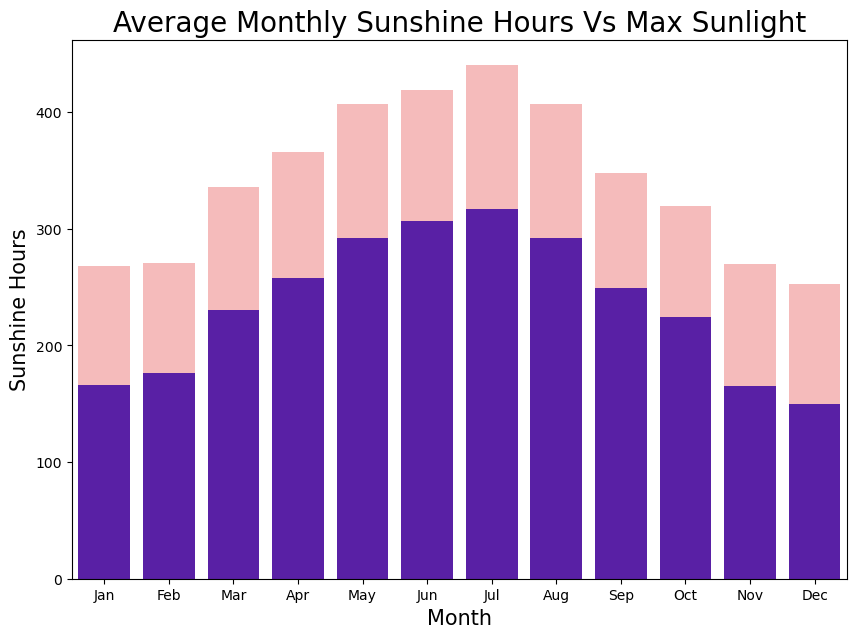

In [219]:
custom_palette = {'Mean': 'blue', 'Min': 'red'}
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data = mean_sun_sorted, x=mean_sun_sorted.index, y='Hours', color='blue')
sns.barplot(data=max_min_sun, x=max_min_sun.index, y="Max",color='red', alpha=.3)

ax.set_title('Average Monthly Sunshine Hours Vs Max Sunlight', fontsize=20)
ax.set_ylabel('Sunshine Hours', fontsize=15)
ax.set_xlabel('Month', fontsize=15)

Text(0.5, 0, 'Month')

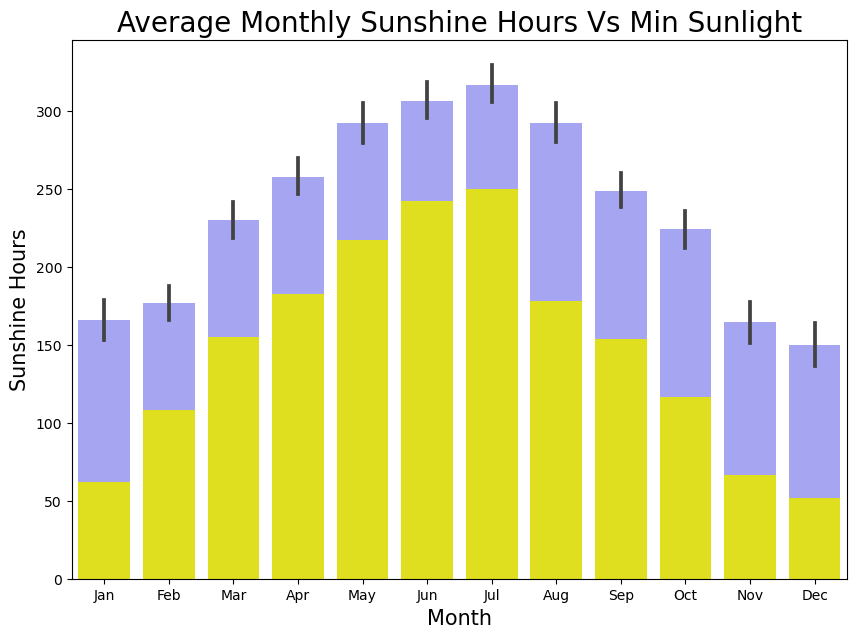

In [220]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data = sunshine_melted, x='Month', y='Hours',alpha=.4, color='blue')
sns.barplot(data=max_min_sun, x=max_min_sun.index, y="Min", color='yellow')

ax.set_title('Average Monthly Sunshine Hours Vs Min Sunlight', fontsize=20)
ax.set_ylabel('Sunshine Hours', fontsize=15)
ax.set_xlabel('Month', fontsize=15)

In [221]:
sunshine_hours_us.sort_values(by='Year', ascending=False,inplace=True)

C:\Users\mainf\AppData\Local\Temp\ipykernel_29688\115391948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunshine_hours_us.sort_values(by='Year', ascending=False,inplace=True)


Text(0, 0.5, 'Sunshine Hours')

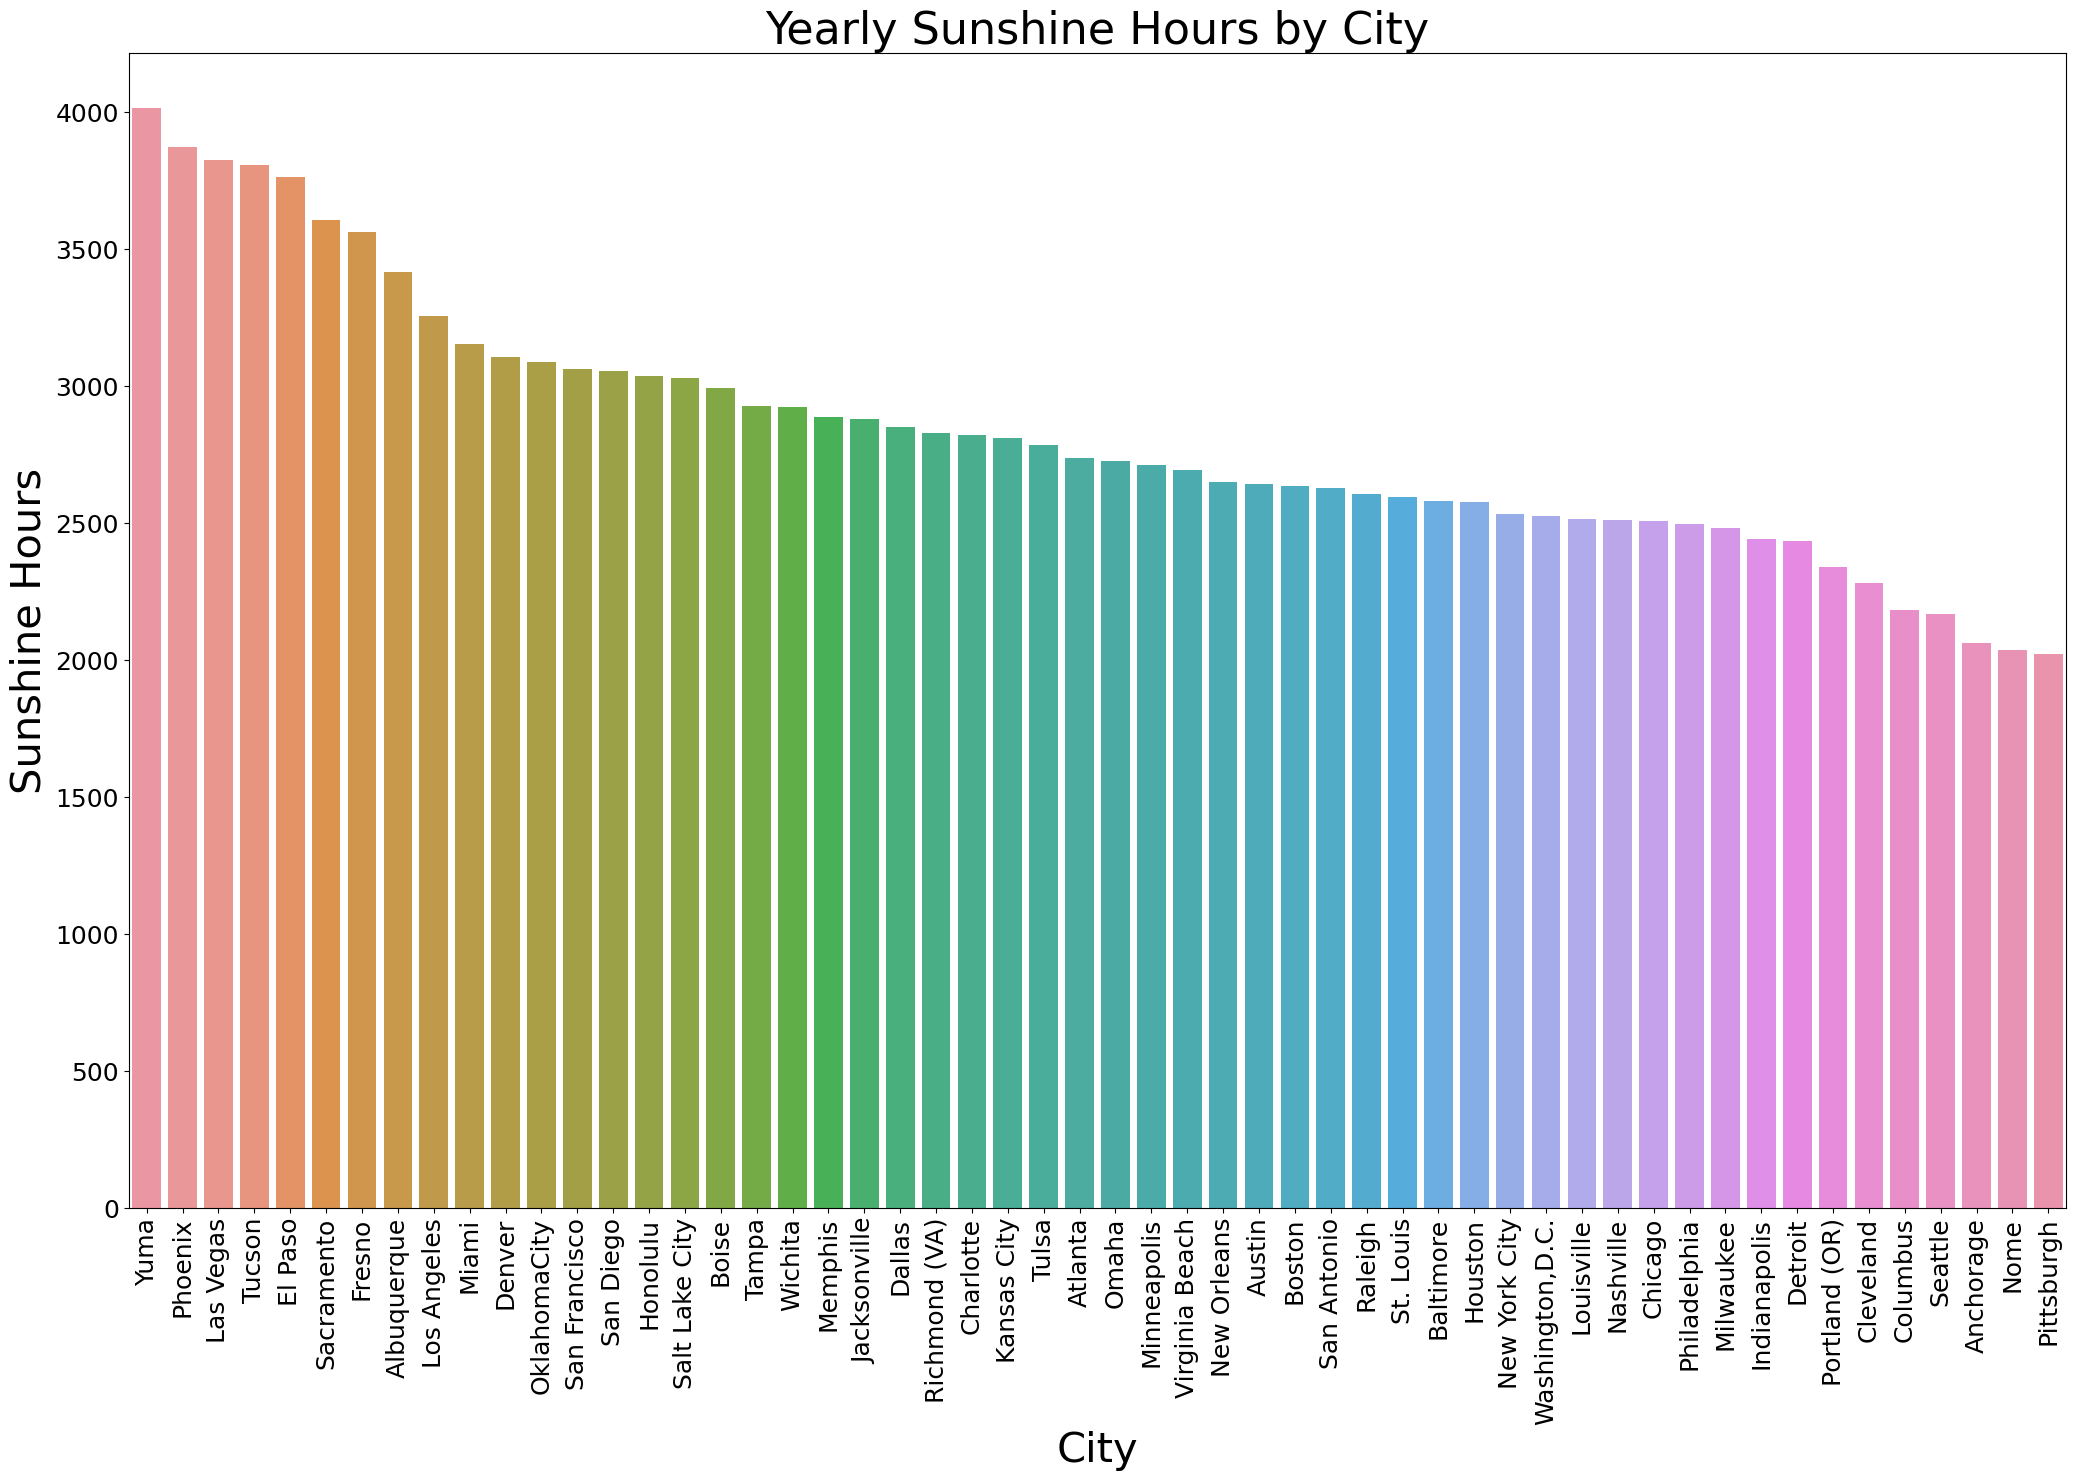

In [222]:
fig, ax = plt.subplots(figsize=(25,15))
sns.barplot(x='City', y='Year',data=sunshine_hours_us)
plt.xticks(rotation=90)
ax.tick_params(axis='both', which='both', labelsize=18)
ax.set_title('Yearly Sunshine Hours by City',fontsize = 32)
ax.set_xlabel('City', fontsize=30)
ax.set_ylabel('Sunshine Hours', fontsize=30)

# Power Generation in US

In [15]:
power_generation.head()

,description,units,source key,Jan 2001,Feb 2001,Mar 2001,Apr 2001,May 2001,Jun 2001,Jul 2001,...,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016
0,Net generation for all sectors,thousand megawatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,NaN,ELEC.GEN..M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States : all fuels (utility-scale),NaN,ELEC.GEN.ALL-US-99.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States : other renewables,thousand megawatthours,ELEC.GEN.AOR-US-99.M,6025.0,5310.0,5795.0,5827.0,5738.0,5964.0,6244.0,...,28738.0,31084.0,29666.0,28711.0,26236.0,28372.0,24465.0,26529.0,29749.0,28819.0
4,United States : wind,thousand megawatthours,ELEC.GEN.WND-US-99.M,389.0,431.0,532.0,685.0,635.0,670.0,635.0,...,20138.0,21939.0,20799.0,18848.0,16303.0,17618.0,13589.0,16404.0,20335.0,19406.0


In [16]:
power_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Columns: 194 entries, description to Nov 2016
dtypes: float64(191), object(3)
memory usage: 16.8+ KB


In [17]:
power_generation.isnull().sum()

description    0
units          3
source key     1
Jan 2001       4
Feb 2001       4
              ..
Jul 2016       4
Aug 2016       4
Sep 2016       4
Oct 2016       4
Nov 2016       4
Length: 194, dtype: int64

In [18]:
power_generation.description.unique()

array(['Net generation for all sectors', 'United States',
       'United States : all fuels (utility-scale)',
       'United States : other renewables', 'United States : wind',
       'United States : all utility-scale solar',
       'United States : geothermal', 'United States : biomass',
       'United States : wood and wood-derived fuels',
       'United States : other biomass'], dtype=object)

In [19]:
#Get energy generation values for just the US and just solar
solar_generation_us = power_generation[power_generation.description == 'United States : all utility-scale solar'] 

In [20]:
solar_generation_us.head()

,description,units,source key,Jan 2001,Feb 2001,Mar 2001,Apr 2001,May 2001,Jun 2001,Jul 2001,...,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016
5,United States : all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-US-99.M,7.0,13.0,31.0,39.0,81.0,91.0,92.0,...,2242.0,2617.0,2880.0,3425.0,3473.0,3945.0,3969.0,3635.0,3191.0,2767.0
10,United States : all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-US-99.M,7.0,13.0,31.0,39.0,81.0,91.0,92.0,...,2242.0,2617.0,2880.0,3425.0,3473.0,3945.0,3969.0,3635.0,3191.0,2767.0


In [21]:
#check to make sure both rows are duplicates
comparison = solar_generation_us.iloc[0, :] == solar_generation_us.iloc[1, :]
if comparison.any() == False:
    print('at least one value is different')
else:
    print('all values are the same')

all values are the same


In [22]:
#drop duplicate row
solar_generation_us.drop(10, inplace = True)

C:\Users\mainf\AppData\Local\Temp\ipykernel_31468\1968611377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_generation_us.drop(10, inplace = True)


In [23]:
solar_generation_us

,description,units,source key,Jan 2001,Feb 2001,Mar 2001,Apr 2001,May 2001,Jun 2001,Jul 2001,...,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016
5,United States : all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-US-99.M,7.0,13.0,31.0,39.0,81.0,91.0,92.0,...,2242.0,2617.0,2880.0,3425.0,3473.0,3945.0,3969.0,3635.0,3191.0,2767.0


In [24]:
solar_generation_us.drop(columns=['source key'], inplace=True)

C:\Users\mainf\AppData\Local\Temp\ipykernel_31468\713350337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_generation_us.drop(columns=['source key'], inplace=True)


In [25]:
solar_generation_us

,description,units,Jan 2001,Feb 2001,Mar 2001,Apr 2001,May 2001,Jun 2001,Jul 2001,Aug 2001,...,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016
5,United States : all utility-scale solar,thousand megawatthours,7.0,13.0,31.0,39.0,81.0,91.0,92.0,85.0,...,2242.0,2617.0,2880.0,3425.0,3473.0,3945.0,3969.0,3635.0,3191.0,2767.0


In [26]:
solar_generation_us = solar_generation_us.T

In [27]:
solar_generation_us.reset_index()
solar_generation_us.index.name= 'Year'
solar_generation_us.rename(columns={solar_generation_us.columns[0]: 'thousand megawatthours'}, inplace=True)

solar_generation_us.head()

,thousand megawatthours
Year,
description,United States : all utility-scale solar
units,thousand megawatthours
Jan 2001,7.0
Feb 2001,13.0
Mar 2001,31.0


In [28]:
#Get rid of the first two rows
solar_generation_us = solar_generation_us.iloc[2:, :]
solar_generation_us.head()

,thousand megawatthours
Year,
Jan 2001,7.0
Feb 2001,13.0
Mar 2001,31.0
Apr 2001,39.0
May 2001,81.0


In [29]:
#Change date to datetime data type and only keep the year to aggregate the total sum for each year in megawatthours
solar_generation_us.index = pd.to_datetime(solar_generation_us.index)
solar_generation_us.index= solar_generation_us.index.year
solar_generation_us.head()

,thousand megawatthours
Year,
2001,7.0
2001,13.0
2001,31.0
2001,39.0
2001,81.0


In [30]:
#Group by year and get the total megawatthours of solar energy generated per year in the US
solar_gen_grouped = solar_generation_us.groupby(level=0)['thousand megawatthours'].sum()
solar_gen_grouped.head()


Year
2001    543.0
2002    556.0
2003    533.0
2004    577.0
2005    550.0
Name: thousand megawatthours, dtype: object

In [31]:
#sort from highest to lowest
solar_gen_grouped.sort_index(ascending=False)

Year
2016    33630.0
2015    24894.0
2014    17691.0
2013     9037.0
2012     4326.0
2011     1818.0
2010     1211.0
2009      888.0
2008      865.0
2007      609.0
2006      509.0
2005      550.0
2004      577.0
2003      533.0
2002      556.0
2001      543.0
Name: thousand megawatthours, dtype: object

In [38]:
# Is it neccesary to do this? 
solar_gen_grouped.index = pd.to_datetime(solar_gen_grouped.index)


In [39]:
solar_gen_grouped.head()

Year
1970-01-01 00:00:00.000002001    543.0
1970-01-01 00:00:00.000002002    556.0
1970-01-01 00:00:00.000002003    533.0
1970-01-01 00:00:00.000002004    577.0
1970-01-01 00:00:00.000002005    550.0
Name: thousand megawatthours, dtype: object

# Sunshine Hours in Major US Cities

In [38]:
sunshine_hours.Country.unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Congo', 'Croatia', 'Cyprus',
       'Czech Republic', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea',
       'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands',
       'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Ivory Coast', 'Japan', 'Kazakhstan', 'Kenya',
       'Latvia', 'Libya', 'Lithuania

In [39]:
#Get sunshine for just US
sunshine_hours_us = sunshine_hours[sunshine_hours['Country'] == 'United States']


In [40]:
sunshine_hours_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 314 to 367
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  54 non-null     object 
 1   City     54 non-null     object 
 2   Jan      54 non-null     float64
 3   Feb      54 non-null     float64
 4   Mar      54 non-null     float64
 5   Apr      54 non-null     float64
 6   May      54 non-null     float64
 7   Jun      54 non-null     float64
 8   Jul      54 non-null     float64
 9   Aug      54 non-null     float64
 10  Sep      54 non-null     float64
 11  Oct      54 non-null     float64
 12  Nov      54 non-null     float64
 13  Dec      54 non-null     float64
 14  Year     54 non-null     float64
dtypes: float64(13), object(2)
memory usage: 6.8+ KB


In [41]:
sunshine_hours_us.head()

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
314,United States,Albuquerque,234.2,225.3,270.2,304.6,347.4,359.3,335.0,314.2,286.7,281.4,233.8,223.3,3415.4
315,United States,Anchorage,82.9,120.5,195.8,235.3,288.7,274.7,250.1,203.9,159.8,117.1,80.6,51.8,2061.2
316,United States,Atlanta,164.0,171.7,220.5,261.2,288.6,284.8,273.8,258.6,227.5,238.5,185.1,164.0,2738.3
317,United States,Austin,163.8,169.3,205.9,205.8,227.1,285.5,317.2,297.9,233.8,215.6,168.3,153.5,2643.7
318,United States,Baltimore,155.4,164.0,215.0,230.7,254.5,277.3,290.1,264.4,221.8,205.5,158.5,144.5,2581.7


In [42]:
sunshine_hours_us.Year.unique()

array([3415.4, 2061.2, 2738.3, 2643.7, 2581.7, 2993.4, 2633.6, 2821. ,
       2508.4, 2280. , 2182.6, 2849.7, 3106.6, 2435.9, 3762.5, 3564.2,
       3035.9, 2577.9, 2440.4, 2879.7, 2809.9, 3825.3, 3254.2, 2514.4,
       2888.3, 3154. , 2483.6, 2710.7, 2510.1, 2648.9, 2534.7, 2036.3,
       3089.4, 2726.9, 2498.4, 3871.6, 2021.3, 2340.9, 2606.3, 2829. ,
       3607.8, 3029.4, 2629.2, 3054.6, 3061.7, 2169.7, 2593.7, 2926.5,
       3806. , 2786. , 2695.1, 2527.7, 2922.4, 4015.3])

In [43]:
#Get the total sunshine hours for each US city
total_sunshine_hours_city = sunshine_hours_us.groupby('City')['Year'].max().reset_index(name='total sunshine hours')

In [44]:
#Sort from highest amount of sunshine hours to lowest
total_sunshine_hours_city.sort_values(by='total sunshine hours', ascending=False)

,City,total sunshine hours
53,Yuma,4015.3
35,Phoenix,3871.6
21,Las Vegas,3825.3
48,Tucson,3806.0
14,El Paso,3762.5
40,Sacramento,3607.8
15,Fresno,3564.2
0,Albuquerque,3415.4
22,Los Angeles,3254.2
25,Miami,3154.0
